In [551]:
%matplotlib inline
import jsonextended as ejson
print(ejson.__version__)
ejson.utils.load_memit()
import numpy as np
import pandas as pd
from decimal import Decimal
from pathlib2 import Path
test_path = Path('jsonextended/_example_json_folder/dir1/file1.json')
from IPython.display import display

0.1.3.3


# Introduction

Problems:
1. Simulation/Experimental data output format nearly always different
2. Lots of Data
3. GUI analysis packages can be restrictive and break work-flow
4. Unit Handling

pure python, json is on disk, dict is in memory, don't have to use specific methods to get a certain parts of the data, perform analysis in consistent manner

Until necessary, remaining generic, by using a simple, open-standard data format, common scientific python packages.
Try not to hide data in complex objects

1. Convert data to json format (nested dictionaries of common data types)
    - Provide text data parsing class, which can be sub-classed
    - provide functions to move json data between on-disk and in-memory formats(using json and ijson)
2. Basic printing and manipulation of nested dictionaries
    - suite of functions provided
3. More advanced manipulation and analysis
    - data analysis (using pandas)
    - geometrical analysis 
    
in documentation mention jsonschema

json ubiquitous especially in web apps

# Load/Indexing Speed Tests

In [3]:
ejson.utils.change_ijson_backend('yajl2')
d=ejson.json_to_dict(test_path,key_path=['initial','crystallographic'],in_memory=False)

//anaconda/envs/pythreejs/lib/python2.7/site-packages/ijson/__init__.pyc


In [2]:
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=['999','initial','crystallographic'],in_memory=False)


1 loop, best of 3: 19.8 s per loop


In [6]:
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=['999','initial','crystallographic'],in_memory=False)


1 loop, best of 3: 18.7 s per loop


In [9]:
ijson.__file__

'//anaconda/envs/pythreejs/lib/python2.7/site-packages/ijson/backends/yajl2.pyc'

In [6]:
d = ejson.json_to_dict(test_path)
d2 = {}
for i in range(1000):
    d2[str(i)] = d
ejson.utils.memory_usage()
ejson.dict_to_json(d2,'large_test.json',overwrite=True)

In [24]:
%timeit ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
%timeit ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True,parse_float=float)

1 loop, best of 3: 2.66 s per loop
1 loop, best of 3: 288 ms per loop


In [3]:
index = '999'
print('index = {}'.format(index))
print('get dictionary')
print('---------------')
print('on disk')
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
%memit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
print('in memory')
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)
%memit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)
print('get keys')
print('---------------')
print('on disk')
%timeit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
%memit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
print('in memory')
%timeit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)
%memit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)

index = 999
get dictionary
---------------
on disk
1 loop, best of 3: 303 ms per loop
maximum of 3: 101.046875 MB per loop
in memory
1 loop, best of 3: 18.1 s per loop
maximum of 3: 3.777344 MB per loop
get keys
---------------
on disk
1 loop, best of 3: 284 ms per loop
maximum of 3: 101.785156 MB per loop
in memory
1 loop, best of 3: 18 s per loop
maximum of 3: 3.476562 MB per loop


In [6]:
index = '1'
print('index = {}'.format(index))
print('get dictionary')
print('---------------')
print('on disk')
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
%memit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
print('in memory')
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)
%memit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)
print('get keys')
print('---------------')
print('on disk')
%timeit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
%memit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True)
print('in memory')
%timeit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)
%memit -r 3 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)

index = 1
get dictionary
---------------
on disk
1 loop, best of 3: 299 ms per loop
maximum of 3: 103.960938 MB per loop
in memory
10 loops, best of 3: 24.6 ms per loop
maximum of 3: 5.007812 MB per loop
get keys
---------------
on disk
1 loop, best of 3: 294 ms per loop
maximum of 3: 104.574219 MB per loop
in memory
1 loop, best of 3: 18.1 s per loop
maximum of 3: 3.644531 MB per loop


In [4]:
print('Parsing Decimals')
index = '999'
print('index = {}'.format(index))
print('get dictionary')
print('---------------')
print('on disk')
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True,parse_decimal=True)
%memit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=True,parse_decimal=True)
print('in memory')
%timeit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False,parse_decimal=True)
%memit -r 3 ejson.json_to_dict('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False,parse_decimal=True)

Parsing Decimals
index = 999
get dictionary
---------------
on disk
1 loop, best of 3: 2.71 s per loop
maximum of 3: 179.109375 MB per loop
in memory
1 loop, best of 3: 19.3 s per loop
maximum of 3: 3.656250 MB per loop


In [16]:
%timeit -r 1 ejson.json_keys('large_test.json',key_path=[index,'initial','crystallographic'],in_memory=False)

1 loop, best of 1: 18.1 s per loop


In [13]:
%memit -r 1 ejson.json_to_dict('large_test.json',key_path=['6','initial','crystallographic'],in_memory=False)

maximum of 1: 5.812500 MB per loop


In [16]:
from pathlib2 import Path
path = Path('jsonextended/_example_json_folder/dir1/file1.json')
print(ejson.json_keys(path,key_path=['initial','crystallographic'],in_memory=True))
print(ejson.json_keys(path,key_path=['initial','crystallographic'],in_memory=False))
%memit ejson.json_to_dict(path,key_path=['initial','crystallographic'],in_memory=True)
%memit ejson.json_to_dict(path,key_path=['initial','crystallographic'],in_memory=False)
%timeit -r 1 ejson.json_keys(path,key_path=['initial','crystallographic'],in_memory=True)
%timeit -r 1 ejson.json_keys(path,key_path=['initial','crystallographic'],in_memory=False)

['geometry', 'lattice_parameters', 'lattice_vectors', 'volume']
['geometry', 'lattice_parameters', 'lattice_vectors', 'volume']
maximum of 3: 5.015625 MB per loop
maximum of 3: 2.320312 MB per loop
1000 loops, best of 1: 807 µs per loop
100 loops, best of 1: 18 ms per loop


In [24]:
import jsonextended as ejson
mem = ejson.utils.memory_usage


# CrystalDFTParser test

In [3]:

from ejson.parsers import CrystalDFTParser

fname = 'example_crystal_opt_output.out'

parser = CrystalDFTParser()
units = {'energy':'au','distance':'angstrom',
         'density':'g.cm^3','angle':'degree'}
parser.add_data(units.keys(),units.values(),init_keys=['units'])
parser.read_file(fname)
parser.output_json('test.json',indent=3,overwrite=True)
ejson.dict_pprint(parser.data,depth=2)

initial: 
  crystallographic: {...}
  primitive: {...}
meta: 
  converged:  True
  input:      /export111/work/ea808/crystal/corrosion/fes_phases/ehsan/pyrrhotit 
              e_B3LYP_AFM_SL12_fullOPT.d12
  start date: Thu Aug 18 20:03:15 BST 2016
optimisation: 
  steps: {...}
optimised: 
  crystallographic: {...}
  energy: -24062.2939637
  primitive: {...}
units: 
  angle:    degree
  density:  g.cm^3
  distance: angstrom
  energy:   au


In [4]:
str(1)

'1'

In [3]:
from __future__ import unicode_literals
print(['a','b'])

[u'a', u'b']


In [4]:
from isim import units
uschema =   {'energy':'eV','x':'angstrom','y':'angstrom','z':'angstrom','volume':'angstrom^3'}
ejson.dict_pprint(units.apply_unitschema(parser.data,uschema))

initial: 
  crystallographic: 
    geometry: {...}
    lattice_parameters: {...}
    lattice_vectors: {...}
    volume: 924.62752781 Å ** 3
  primitive: 
    density: 4.65
    geometry: {...}
    lattice_parameters: {...}
    volume:  462.313764 Å ** 3
meta: 
  converged:  True
  input:      /export111/work/ea808/crystal/corrosion/fes_phases/ehsan/pyrrhotit 
              e_B3LYP_AFM_SL12_fullOPT.d12
  start date: Thu Aug 18 20:03:15 BST 2016
optimisation: 
  steps: 
    2: {...}
    3: {...}
    4: {...}
    5: {...}
    6: {...}
    7: {...}
    8: {...}
    9: {...}
    10: {...}
    11: {...}
    12: {...}
    13: {...}
    14: {...}
    15: {...}
    16: {...}
    17: {...}
    18: {...}
    19: {...}
    20: {...}
    21: {...}
    22: {...}
    23: {...}
    24: {...}
    25: {...}
    26: {...}
    27: {...}
    28: {...}
    29: {...}
    30: {...}
    31: {...}
    32: {...}
    33: {...}
    34: {...}
    35: {...}
    36: {...}
    37: {...}
    38: {...}
    39: {...}
    

In [6]:
debug

> /Users/cjs14/Box Sync/PhD/crystal/jsonextended/core.py(647)convert_str()
    645             return str(tuple([str(v) if isinstance(v,basestring) else v for v in obj]))
    646         else:
--> 647             return str(obj)
    648 
    649     if align_vals:

ipdb> obj
u'924.62752781 \xc5 ** 3'
ipdb> str(obj)
*** UnicodeEncodeError: 'ascii' codec can't encode character u'\xc5' in position 13: ordinal not in range(128)
ipdb> print(obj)
924.62752781 Å ** 3
ipdb> exit


In [4]:
from isim import units
>>> from pprint import pprint

>>> data = {'energy':1,'x':[1,2],'other':{'y':[4,5]},'y':[4,5],'meta':None}
>>> uschema =   {'energy':'eV','x':'nm','other':{'y':'m'},'y':'cm'}
>>> data_units = units.apply_unitschema(data,uschema)
>>> pprint(data_units)


{'energy': <Quantity(1, 'electron_volt')>,
 'meta': None,
 'other': {'y': <Quantity([4 5], 'meter')>},
 'x': <Quantity([1 2], 'nanometer')>,
 'y': <Quantity([4 5], 'centimeter')>}


In [22]:
# wrap dataframe?
a={'a':[1,2,3],'b':[4,5,6]}
pd.DataFrame(a,columns=['a','b'])

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
from IPython.display import display, HTML, Latex
def print_html(s):
    display(HTML(s.replace(' ','&nbsp;&nbsp;')))
def print_latex(s):
    display(Latex(s))


In [32]:
from __future__ import unicode_literals
from pint import UnitRegistry
ureg = UnitRegistry()

from decimal import Decimal
#print ureg.default_system
dir(ureg.sys.mks)
a=ureg.Quantity([Decimal(1),Decimal(1)],'feet')
#print a.to_base_units()
' {0:H} '.format(a)

u' \\[\\begin{pmatrix}1 & 1\\end{pmatrix} foot\\] '

In [62]:
a=ureg.Quantity(5.34532553,'km')
str(a.units)

'kilometer'

In [123]:
import jsonschema
jsonschema.validate(data,{'properties':{'energy':
                                         {'type':'number'},
                                       'x':
                                         {'type':'array',
                                         'items':{'type':'number'}},
                                       'y':
                                         {'type':'array',
                                         'items':{'type':'number'}},
                                       },
                         'required':['energy','x','y']})

True


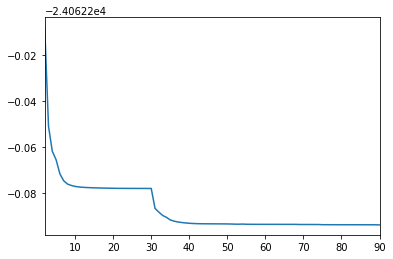

In [19]:
parser = BasicParser()
parser.read_json('test.json')
tree = DictTree(parser.data)
print(tree.meta.converged)
energies = tree.optimisation.steps.attr_DF.loc['energy']
energies.index = energies.index.astype(int)
energies.sort_index().plot();

In [38]:
1 * ureg.parse_expression('kJ/mol')

<Quantity(1.0, 'kilojoule / mole')>

In [74]:
from pint import UnitRegistry
ureg = UnitRegistry()
a = 1 * ureg.parse_expression('kJ/mol')
print(a.to('eV/mol'))
print(a)
import matplotlib.pyplot as plt
#plt.plot(a)
#import pandas as pd
#pd.DataFrame({'a':a})
from IPython.display import Latex,display
display(Latex('a a a ${:L}$'.format(a)))
display(Latex('${:L}$'.format(a)))
display(Latex('${}$'.format(1)))
display(1)

6.24150947961e+21 electron_volt / mole
1.0 kilojoule / mole


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1

In [31]:
df = pd.DataFrame({'a':[1,2,3]})
df.a = df.a * ureg.parse_expression('kJ/mol')

- find_units=True to look in dict
- or use units_schema
- take one that matches longest path (from back), largest subset
- conversion
- auto labelling

In [36]:
from pint import UnitRegistry
ureg = UnitRegistry()

d = ejson.dict_flatten(ejson.json_to_dict('test.json'))
test1,test2 = {},{}
for key, value in d.items():
    if 'energy' in key:
        if isinstance(value,basestring):
            continue
        #d[key] = '${:L}$'.format(value * ureg.parse_expression('kJ.mol^-1'))
        test1[key] = value * ureg.parse_expression('eV/mol')
        test2[key] = value * ureg.parse_expression('kJ/mol')
        
d = ejson.dict_unflatten(d)

from IPython.display import Latex,HTML,display
import pandas as pd
def print_latex(s):
    display(HTML(s.replace(' ','&nbsp;')))
#print_latex('          a')
ejson.dict_pprint(ejson.dict_filter_keys(d,['energy','volume']),print_func=None)
#pd.Series(test1)*pd.Series(test2)
#ejson.dict_filter_keys(d,['energy','volume'])

initial: 
  crystallographic: 
    volume: 924.62752781
  primitive: 
    volume: 462.313764
optimisation: 
  steps: 
    2: 
      crystallographic: 
        volume: 959.49545054
      energy: -24062.2079387
      primitive: 
        volume: 479.747725
    3: 
      crystallographic: 
        volume: 1014.67759132
      energy: -24062.2510003
      primitive: 
        volume: 507.338796
    4: 
      crystallographic: 
        volume: 1047.7423063
      energy: -24062.2619244
      primitive: 
        volume: 523.871153
    5: 
      crystallographic: 
        volume: 1056.07887578
      energy: -24062.2656171
      primitive: 
        volume: 528.039438
    6: 
      crystallographic: 
        volume: 1060.61206239
      energy: -24062.2717923
      primitive: 
        volume: 530.306031
    7: 
      crystallographic: 
        volume: 1053.47732979
      energy: -24062.2747626
      primitive: 
        volume: 526.738665
    8: 
      crystallographic: 
        volume: 1044.51231033

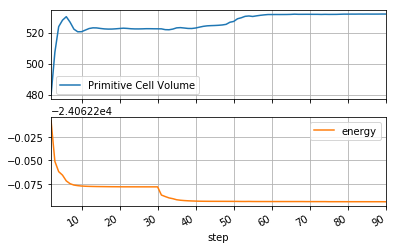

In [3]:
d = ejson.json_to_dict('test.json')
d1 = ejson.dict_filter_paths(d,[('optimisation','energy'),
                                ('optimisation','step')])
d1 = ejson.dict_flatten2d(d1)
d2 = ejson.dict_filter_paths(d,[('optimisation','primitive','volume')])
d2 = ejson.dict_remove_keys(d2,['primitive'])
d2 = ejson.dict_rename_keys(d2,{'volume':'Primitive Cell Volume'})
d2 = ejson.dict_flatten2d(d2)
d3 = ejson.dicts_merge([d1,d2])

df = pd.DataFrame(d3).T.sort_values('step')
axes = df.plot('step',subplots=True,grid=True)

In [18]:
df.describe()

,energy,step,volume
count,89.000000,89.000000,89.000000
mean,-24062.286741,46.000000,526.402541
std,0.012361,25.836021,6.922816
min,-24062.293964,2.000000,479.747725
25%,-24062.293727,24.000000,522.665697
50%,-24062.293491,46.000000,526.712230
75%,-24062.278072,68.000000,531.786158
max,-24062.207939,90.000000,532.015975


In [17]:
df = pd.DataFrame({('a','b'):{'d':1,'e':2},('a','c'):{'d':3,'e':4},('x','y','z'):{'d':3,'e':4}}).T
df.plot()

d  e
a b NaN  1  2
  c NaN  3  4
x y z    3  4

In [11]:
import json
import numpy as np
isinstance(np.array([1]),np.ndarray)

True

In [4]:
d = ejson.json_to_dict('test.json')
ejson.dict_to_html(d,depth=2,max_length=40)

In [8]:
df = pd.DataFrame({Decimal(1):[1,2,3],Decimal(2):[4,5,6]})

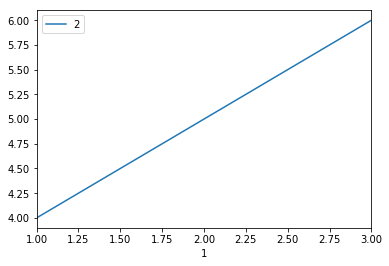

In [16]:
ax = df.plot(Decimal(1))

In [21]:
pd.DataFrame({'a':{'units':'metre','magnitude':[2,3,4]},'b':{'units':'second','magnitude':[4,5,6]}})

,a,b
magnitude,"[2, 3, 4]","[4, 5, 6]"
units,metre,second


In [8]:
try:
    import lkjlkjlkj
except ImportError:
    pass


In [2]:
ejson._run_nose()

Usage: ipykernel_launcher.py [options]

ipykernel_launcher.py: error: no such option: -f


SystemExit: 2

//anaconda/envs/pythreejs/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Data Folders JSONisation

In [7]:
import jsonextended as ejson

path = ejson.get_test_path()
ejson.json_keys(path)

['dir1', 'dir2', 'dir3']

In [14]:
jdict1 = ejson.json_to_dict(path)
ejson.dict_pprint(jdict1,depth=2)

dir1: 
  dir1_1: {...}
  file1: {...}
  file2: {...}
dir2: 
  file1: {...}
dir3: 


In [17]:
ejson.dict_to_html(jdict1,depth=2)

In [9]:
jdict2 = ejson.json_to_dict(path,['dir1','file1'])
ejson.dict_pprint(jdict2,depth=1)

initial: {...}
meta: {...}
optimised: {...}
units: {...}


In [10]:
filtered = ejson.dict_filter_keys(jdict2,['vol*'],use_wildcards=True)
ejson.dict_pprint(filtered)

initial: 
  crystallographic: 
    volume: 924.62752781
  primitive: 
    volume: 462.313764
optimised: 
  crystallographic: 
    volume: 1063.98960509
  primitive: 
    volume: 531.994803


In [12]:
ejson.dict_pprint(ejson.dict_flatten(filtered))

('initial', 'crystallographic', 'volume'):   924.62752781
('initial', 'primitive', 'volume'):          462.313764
('optimised', 'crystallographic', 'volume'): 1063.98960509
('optimised', 'primitive', 'volume'):        531.994803


# Units Schema

In [31]:
from jsonextended.units import apply_unitschema, split_quantities
withunits = apply_unitschema(filtered,{'volume':'angstrom^3'})
ejson.dict_pprint(withunits)

initial: 
  crystallographic: 
    volume: 924.62752781 Å ** 3
  primitive: 
    volume: 462.313764 Å ** 3
optimised: 
  crystallographic: 
    volume: 1063.98960509 Å ** 3
  primitive: 
    volume: 531.994803 Å ** 3


In [29]:
newunits = apply_unitschema(withunits,{'volume':'nm^3'})
ejson.dict_pprint(newunits)

initial: 
  crystallographic: 
    volume: 0.92462752781 nm ** 3
  primitive: 
    volume: 0.462313764 nm ** 3
optimised: 
  crystallographic: 
    volume: 1.06398960509 nm ** 3
  primitive: 
    volume: 0.531994803 nm ** 3


In [34]:
ejson.dict_pprint(split_quantities(newunits),depth=4)

initial: 
  crystallographic: 
    volume: 
      magnitude: 0.92462752781
      units:     nanometer ** 3
  primitive: 
    volume: 
      magnitude: 0.462313764
      units:     nanometer ** 3
optimised: 
  crystallographic: 
    volume: 
      magnitude: 1.06398960509
      units:     nanometer ** 3
  primitive: 
    volume: 
      magnitude: 0.531994803
      units:     nanometer ** 3


# visualising geometric objects (aka atoms)

    conda install pythreejs, traitlets, ipywidgets

## Geometric Object Model Class

In [558]:
import traitlets as trait
import ipywidgets as widgets
#TODO change color trait to accept rgb tuple
#TODO inefficient to set x,y,z separately? 
#      ok if hol_trait_notifications and observing all names?

class GeometricObject(trait.HasTraits):
    """ a geometric object
    
    """
    id = trait.Int(1)
    x = trait.CFloat(0,help="the x coordinate")
    y = trait.CFloat(0,help="the y coordinate")
    z = trait.CFloat(0,help="the z coordinate")

    visible = trait.CBool(True)
    color = widgets.Color('red')
    transparency = trait.CFloat(1,min=0.0,max=1.0)

    label = trait.CUnicode('n/a')
    label_visible = trait.CBool(False)
    label_color = widgets.Color('red')
    label_transparency = trait.CFloat(1,min=0.0,max=1.0)

class Sphere(GeometricObject):
    """ a spherical object
    """
    radius = trait.CFloat(1,min=0.)
    


## Link GeometricObject to PyThreeJS View

In [50]:
import pythreejs as js
#TODO: sphere still hides label, even if opacity < 1

def create_jsmesh(gobject, 
    grepr=js.SphereGeometry,gmap={'radius':'radius'},
    mrepr=js.LambertMaterial):
    """create PyThreeJS Text Mesh for GeometricObject
    and link attributes
    
    Properties
    ----------
    gobject : GeometricObject
    grepr : pythreejs.Object3d
        pythreejs geometric representation 
    gmap : dict
        gobject attribute (key) to 
        pythreejs representation attribute (value)
    mrepr : pythreejs.Material
        pythreejs material representation
    
    """
    gkwargs = {v:getattr(gobject, k) for k,v in gmap.items()}
    geometry = grepr(**gkwargs)

    material = mrepr(color=gobject.color,opacity=gobject.transparency)

    mesh = js.Mesh(geometry=geometry,
                  material=material,
                  position=[gobject.x,gobject.y,gobject.z])
    mesh.add_traits(gobject_id=trait.Int())
    mesh.gobject_id = gobject.id

    def change_visibility(change):
        mesh.visible = change.new
    gobject.observe(change_visibility,names='visible')    
    def change_color(change):
        material.color = change.new
    gobject.observe(change_color,names='color')
    def change_opacity(change):
        material.opacity = change.new
    gobject.observe(change_opacity,names='transparency')
    def change_position(change):
        mesh.position = [gobject.x,gobject.y,gobject.z]
    gobject.observe(change_position,names=['x','y','z'])

    for gattr, jsattr in gmap.items():
        def change_attr(change):
            setattr(geometry,jsattr, change.new)
        gobject.observe(change_attr,names=gattr)
    
    return mesh

def create_jslabelmesh(gobject,
                  height='radius'):
    """create PyThreeJS Text Mesh for GeometricObject
    and link attributes

    Properties
    ----------
    gobject : GeometricObject
    height: float or str 
        if string, link to that gobject attribute

    """
    text_map = js.TextTexture(string=gobject.label, color=gobject.label_color, 
                        size=100, squareTexture=False)
    material = js.SpriteMaterial(map=text_map,opacity=gobject.label_transparency)
    height_attr = getattr(gobject,height) if isinstance(height,basestring) else height
    mesh = js.Sprite(material=material, position=[gobject.x,gobject.y,gobject.z], 
                  scaleToTexture=True, 
                  scale=[1, height_attr, 1])
    mesh.add_traits(gobject_id=trait.Int())
    mesh.gobject_id = gobject.id

    def change_visibility(change):
        mesh.visible = change.new
    gobject.observe(change_visibility,names='label_visible')    
    def change_color(change):
        text_map.color = change.new
    gobject.observe(change_color,names='label_color')
    def change_opacity(change):
        material.opacity = change.new
    gobject.observe(change_opacity,names='label_transparency')
    def change_position(change):
        mesh.position = [gobject.x,gobject.y,gobject.z]
    gobject.observe(change_position,names=['x','y','z'])
    def change_label(change):
        text_map.string = change.new
    gobject.observe(change_label,names='label')

    if isinstance(height,basestring):
        def change_height(change):
            mesh.scale = [1, change.new, 1]
        gobject.observe(change_height,names=height)

    return mesh

In [51]:
atom = Sphere()
gmesh = link_gobject_js(atom)
lmesh = link_glabel_js(atom)

scene = js.Scene(children=[lmesh,js.AmbientLight(color='#777777')])
            
camera = js.OrthographicCamera(position=[0,0,1],
                            top=10,bottom=-10,near=-10,
                            children=[js.DirectionalLight(color='white', 
                                    position=[3, 5, 1], 
                                    intensity=0.5)])
control = js.OrbitControls(controlling=camera)
renderer = js.Renderer(camera=camera,background='gray',background_opacity=.1,
                    # height='400',width='400',
                    scene=scene,controls=[control])
renderer

In [52]:
atom.radius = 2
atom.label = 'Fe'
atom.visible = False
atom.x = 3
atom.label_color = 'green'

## Create GObject Container

In [597]:
import pandas as pd
import numpy as np
import sys

#TODO change gtype_default to e.g. isim.Sphere
#   otherwise might read in from local namespace
#TODO create_df might break if trait is a list

class UniqueGObjects(trait.TraitType):

    info_text = 'a collection of GeometricObjects with unique ids'
    default_value = ()
    
    def validate(self, obj, value):   
        
        if not value:
            return ()
        
        # all items must be geometric objects
        if not all([isinstance(o, GeometricObject) for o in value]):
            self.error(obj, value)
        
        # all objects must have a unique id
        ids = [o.id for o in value]
        if len(ids) != len(set(ids)):
            self.error(obj, value)
            
        return tuple(value)
    
    
class GeometricCollection(trait.HasTraits):
    """ collection of GeometricObjects
    
    ensures each gobject has a unique id
    
    """
    # a list of all geometric objects
    gobjects = UniqueGObjects()
        
    def add_gobject(self, gobject):
        """ add geometric object
        """
        try:
            self.gobjects = list(self.gobjects) + [gobject]
        except trait.TraitError as err:
            raise ValueError('gobject is not a GeometricObject '
                             'or there is an id clash:\n{}'.format(err))
    
    def add_gobjects(self, gobjects):
        """ add geometric objects
        """
        try:
            self.gobjects = list(self.gobjects) + gobjects
        except trait.TraitError as err:
            raise ValueError('gobject is not a GeometricObject '
                             'or there is an id clash:\n{}'.format(err))
    
    def _get_ids(self):
        return [o.id for o in self.gobjects]
    ids = property(_get_ids)

    def gobject(self, id):
        """get gobject by id
        """
        return self.gobjects[self.ids.index(id)]
    
    def pop(self, id):
        """remove and return gobject by id """
        gobjects = list(self.gobjects)
        popped = gobjects.pop(self.ids.index(id))
        self.gobjects = gobjects
        return popped 
    
    def gobjects_with_trait(self, name, value=None):
        """ get all gobjects with certain trait
        
        name : str
            name of trait
        value
            if not None, only return gobjects with this trait value
        
        """
        gobjects = []
        for obj in self.gobjects:
            if obj.has_trait(name):
                if getattr(obj, name)==value or value is None:
                    gobjects.append(obj)
        return gobjects
            
    def change_by_df(self, df, columns=None, 
                     gtype_default='Sphere', gtype_column=None,
                    remove_missing=False):
        """ change collection by datafame of gobject traits
        
        df : pd.DataFrame
            dataframe containing 'id' column
        columns : None or str
            use only these columns as attr, if None use all
        gtype_default : str
            default geometric object class to use
        gtype_column : None or str
            if str, use this column to set the geometric object class
        remove_missing : bool
            remove objects not present in dataframe
        
        """
        assert 'id' in df.columns
        if gtype_column is not None:
            assert gtype_column in df.columns, 'df does not contain specified gtype column; {}'.format(gtype_column)
        if not columns is None:
            assert set(df.columns).issuperset(columns), 'required columns not in df'
        assert df.id.nunique() == df.shape[0], "df id's are not unique"
        
        existing_ids = []
        old_objects = []
        for obj in self.gobjects:
            existing_ids.append(obj.id)
            if obj.id in df.id or not remove_missing:
                old_objects.append(obj)
        
        new_objects = []
        new_traits = []
        
        for idx, s in df.iterrows():
             
            # create new objects
            if not s.id in existing_ids:
                gtype_name = gtype_default if gtype_column is None else s[gtype_column]
                try:
                    # creates object from string, but without using unsecure eval
                    gobject = reduce(getattr, gtype_name.split("."), sys.modules[__name__])()
                    assert isinstance(gobject, GeometricObject)
                except Exception as err:
                    raise TypeError(
                    '"{0}" (proposed for id {1}) is not a known GeometricObject: \n {2}'.format(gtype_name, s.id, err))
                
                if not columns is None:
                    s = s[columns]
                    
                new_objects.append(gobject)
            
            else:
                gobject = self.gobject(s.id)
                        
            for key, value in s.iteritems():
                if key==gtype_column:
                    continue
                try:
                    if np.isnan(value):
                        continue
                except:
                    pass
                if not gobject.has_trait(key):
                    raise trait.TraitError('gobject '
                    'with id {0} does not have trait: {1}'.format(s.id, key))
                    
                # wait to set traits until all are objects are tested
                new_traits.append((gobject, key, value))
                    
        # hold trait notifications until all have been updated
        with gobject.hold_trait_notifications():
            for gobject, key, value in new_traits:
                    gobject.set_trait(key, value)

        self.gobjects = tuple(old_objects + new_objects)                

        return

    def trait_df(self, traits=None, incl_class=True):
        """create dataframe of gobjects and their traits
        
        traits : None or list
            if not None, only include these traits in dataframe
        incl_class : bool
            if true, include 'gtype' column with class type of gobject
        """
        data = []
        for obj in self.gobjects:
            if traits is None:
                trait_dict = {name:getattr(obj, name) 
                              for name in obj.trait_names()}
            else:
                trait_dict = {name:getattr(obj, name) 
                              for name in obj.trait_names() if name in traits}   
            if incl_class:
                mod_str = obj.__class__.__module__
                name_str = obj.__class__.__name__
                trait_dict['gtype'] = (name_str if mod_str=='__main__' 
                                       else '.'.join([mod_str,name_str]))
            data.append(trait_dict)
            
        return pd.DataFrame(data)

In [598]:
test_dict = {'id':[0,1,2],
 'x':[0,-1,1],'y':[0,-1,1],'z':[0,0,1],
'color':['red']*3,'transparency':[1]*3,'radius':[1]*3,
'label':['H']*3, 'gtype':['Sphere']*3}
test_df = pd.DataFrame(test_dict)

c = GeometricCollection()
#c.add_gobject(Sphere(id=0,label='hi'))
c.change_by_df(test_df, gtype_column='gtype')
trait_df = c.trait_df()
display(trait_df)
trait_df.color='blue'
trait_df = trait_df.loc[[0,2]]
display(trait_df)
c.change_by_df(trait_df, gtype_column='gtype', remove_missing=True)
display(c.trait_df())

,color,gtype,id,label,label_color,label_transparency,label_visible,radius,transparency,visible,x,y,z
0,red,Sphere,0,H,red,1.0,False,1.0,1.0,True,0.0,0.0,0.0
1,red,Sphere,1,H,red,1.0,False,1.0,1.0,True,-1.0,-1.0,0.0
2,red,Sphere,2,H,red,1.0,False,1.0,1.0,True,1.0,1.0,1.0


,color,gtype,id,label,label_color,label_transparency,label_visible,radius,transparency,visible,x,y,z
0,blue,Sphere,0,H,red,1.0,False,1.0,1.0,True,0.0,0.0,0.0
2,blue,Sphere,2,H,red,1.0,False,1.0,1.0,True,1.0,1.0,1.0


,color,gtype,id,label,label_color,label_transparency,label_visible,radius,transparency,visible,x,y,z
0,blue,Sphere,0,H,red,1.0,False,1.0,1.0,True,0.0,0.0,0.0
1,blue,Sphere,2,H,red,1.0,False,1.0,1.0,True,1.0,1.0,1.0


In [600]:
c.trait_df(['color'], incl_class=False)

,color
0,blue
1,blue


In [332]:
c = GeometricCollection()

def ids_changed(change):
    print('ids change: {0} to {1}'.format(change.old, change.new))
c.observe(ids_changed, names='_ids')

c.add_gobject(GeometricObject())
c.add_gobject(GeometricObject(id=2))
print(c.gobjects, c.ids)
print(c.pop(1))
print(c.gobjects, c.ids)
c.gobjects_with_trait('id',2)

((<__main__.GeometricObject object at 0x11af84990>, <__main__.GeometricObject object at 0x11b572490>), [1, 2])
((<__main__.GeometricObject object at 0x11b572490>,), [2])


In [275]:
c.add_gobject(GeometricObject())

## Link Geometric Collection to PyThreeJS

In [582]:
gobject_jsmapping = {
'Sphere':{'grepr':js.SphereGeometry,
        'gmap':{'radius':'radius'},
        'mrepr':js.LambertMaterial}   
}

glabel_jsmapping = {
'Sphere':{'height':'radius'}
}

def create_js_scene(gcollect, add_objects=True, add_labels=False):
    """create PyThreeJS Scene for GeometricCollection
    and link all GeometricObject attributes and creation/deletion

    Properties
    ----------
    gcollect : GeometricCollection
    add_objects: bool 
        add objects to scene
    add_labels : bool
        add object labels to scene
        
    """    
    assert isinstance(gcollect, GeometricCollection), 'gcollect must be a GeometricCollection'
    
    meshes = []
    for gobject in gcollect.gobjects:
        if add_objects:
            gmesh = create_jsmesh(gobject,
                    **gobject_jsmapping[gobject.__class__.__name__])
            meshes.append(gmesh)
        if add_labels:
            lmesh = create_jslabelmesh(gobject,
                    **glabel_jsmapping[gobject.__class__.__name__])
            meshes.append(lmesh)

    scene = js.Scene(children=meshes+[js.AmbientLight(color='#777777')]) 
    
    def gobjects_changed(change):
        old = set(change.old)
        new = set(change.new)
        removed_objects = old.difference(new)
        added_objects = new.difference(old)

        if removed_objects:
            removed_ids = [o.id for o in removed_objects]
            original_children = []
            for child in scene.children:
                if child.has_trait('gobject_id'):
                    if child.gobject_id not in removed_ids:
                        original_children.append(child)
                else:
                    original_children.append(child)
        else:
            original_children = scene.children

        new_meshes = []
        for gobject in added_objects:
            if add_objects:
                new_meshes.append(create_jsmesh(gobject,
                    **gobject_jsmapping[gobject.__class__.__name__]))
            if add_labels:
                new_meshes.append(create_jslabelmesh(gobject,
                    **glabel_jsmapping[gobject.__class__.__name__]))
                        
        scene.children = new_meshes + original_children

    gcollect.observe(gobjects_changed, names='gobjects')
    
    return scene

In [317]:
atom1 = Sphere(label='atom1')
atom2 = Sphere(id=2,x=2,color='blue',label='atom2')

collection = GeometricCollection()
collection.add_gobjects([atom1, atom2])

scene = create_js_scene(collection,add_objects=False,add_labels=True)
            
camera = js.OrthographicCamera(position=[0,0,1],
                            top=10,bottom=-10,near=-10,
                            children=[js.DirectionalLight(color='white', 
                                    position=[3, 5, 1], 
                                    intensity=0.5)])
control = js.OrbitControls(controlling=camera)
renderer = js.Renderer(camera=camera,background='gray',background_opacity=.1,
                    # height='400',width='400',
                    scene=scene,controls=[control])
renderer

In [318]:
atom2.label_color = 'green'
collection.pop(1)
collection.add_gobject(Sphere(id=6,x=-2,label='new'))

## Test with lots of objects

In [588]:
new_dict = {'id':[],'x':[],'y':[],'z':[]}
number=4
for i in range(-number,number):
         for j in range(-number,number):
             for k in range(-number,number):
                    new_dict['id'].append(len(new_dict['id']))
                    new_dict['x'].append(i)
                    new_dict['y'].append(j)
                    new_dict['z'].append(k)
large_df = pd.DataFrame(new_dict)
large_df.head()

,id,x,y,z
0,0,-4,-4,-4
1,1,-4,-4,-3
2,2,-4,-4,-2
3,3,-4,-4,-1
4,4,-4,-4,0


In [584]:
atoms = GeometricCollection()
atoms.change_by_df(large_df)

scene = create_js_scene(atoms,add_objects=True,add_labels=False)
            
camera = js.OrthographicCamera(position=[0,0,1],
                            top=10,bottom=-10,near=-10,
                            children=[js.DirectionalLight(color='white', 
                                    position=[3, 5, 1], 
                                    intensity=0.5)])
control = js.OrbitControls(controlling=camera)
renderer = js.Renderer(camera=camera,background='gray',background_opacity=.1,
                    # height='400',width='400',
                    scene=scene,controls=[control])
renderer

In [591]:
large_df['color'] = 'green'
large_df.x += 1
atoms.change_by_df(large_df)

## Add Configuration Slider